In [1]:
import os
import pandas as pd
import numpy as np


# Get current working directory
current_dir = os.getcwd()

# Navigate to data folder
data_dir = os.path.join(current_dir, "data")

# Read CSV file
df = pd.read_csv(os.path.join(data_dir, "faers_asthma.csv"), sep=",")


In [2]:
print(df.columns)

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag'],
      dtype='object')


In [3]:
print(df.head)

<bound method NDFrame.head of        Case ID Suspect Product Names   Suspect Product Active Ingredients  \
0      4974950           A-Methapred  Methylprednisolone Sodium Succinate   
1      4974946           A-Methapred  Methylprednisolone Sodium Succinate   
2      4652544           A-Methapred  Methylprednisolone Sodium Succinate   
3      4656790           A-Methapred  Methylprednisolone Sodium Succinate   
4      4610124           A-Methapred  Methylprednisolone Sodium Succinate   
...        ...                   ...                                  ...   
92319  4230505                     -                       Nitrofurantoin   
92320  4236734                     -                           Gentamicin   
92321  4235917                     -                              Aspirin   
92322  4234961                     -               Gold Sodium Thiomalate   
92323  4227900                     -                              Aspirin   

      Reason for Use                         

In [4]:
# Before making any changes to the variables - what does the distribution look like?
# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(df[col].value_counts())

          Patient Age Patient Weight
count           92324          92324
unique           1124           2801
top     Not Specified  Not Specified
freq            31174          70933
Female           58453
Male             25992
Not Specified     7879
Name: Sex, dtype: int64
Asthma                                                                                                             11507
Drug Ineffective;Asthma                                                                                              556
Asthma;Drug Ineffective                                                                                              526
Hospitalisation;Asthma                                                                                               524
Asthma;Hospitalisation                                                                                               519
                                                                                                                   ..

In [5]:
#Create Patient Age column to be only numeric
df['Patient Age'] = df['Patient Age'].str.extract('(\d+)').astype(float)



In [6]:
#Create Patient Weight column to be only numeric 
df['Patient Weight'] = df['Patient Weight'].str.extract('(\d+)').astype(float)


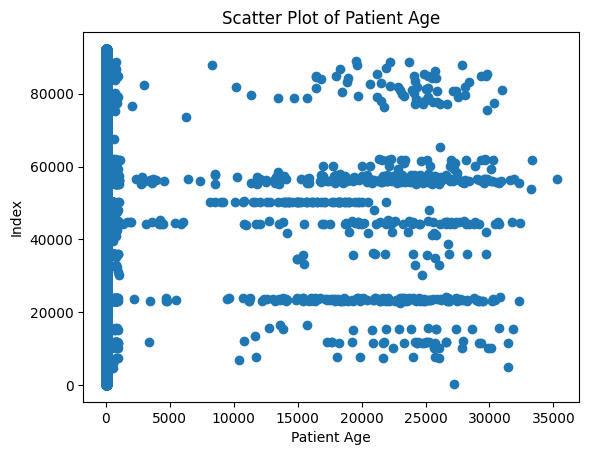

In [7]:
#Visualizing patient age
import matplotlib.pyplot as plt

# create a scatter plot of patient age
plt.scatter(df['Patient Age'], range(len(df)))
plt.xlabel('Patient Age')
plt.ylabel('Index')
plt.title('Scatter Plot of Patient Age')
plt.show()


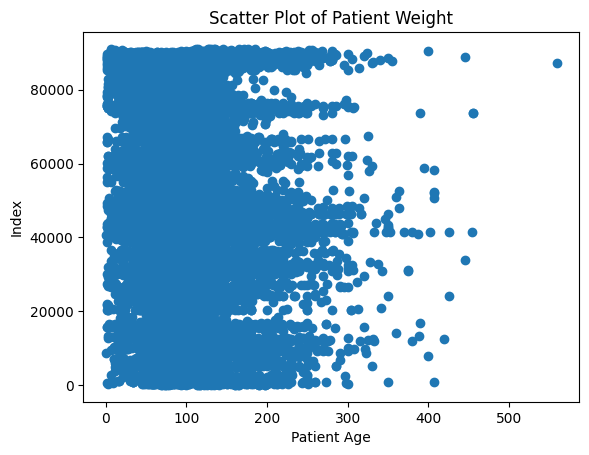

In [8]:
#visualizing patient weight

import matplotlib.pyplot as plt

# create a scatter plot of patient age
plt.scatter(df['Patient Weight'], range(len(df)))
plt.xlabel('Patient Age')
plt.ylabel('Index') 
plt.title('Scatter Plot of Patient Weight')
plt.show()


In [9]:
# get basic descriptive statistics for the numeric columns - After making them nominal variables
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


        Patient Age  Patient Weight
count  61150.000000    21391.000000
mean     271.105004       94.413211
std     2212.847300       50.444914
min        0.000000        0.000000
25%       39.000000       64.000000
50%       54.000000       81.000000
75%       66.000000      111.000000
max    35248.000000      559.000000


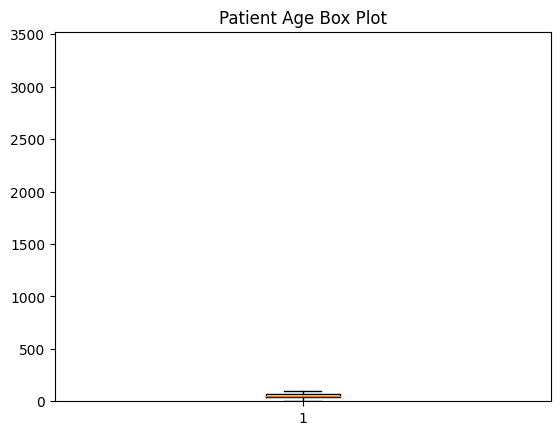

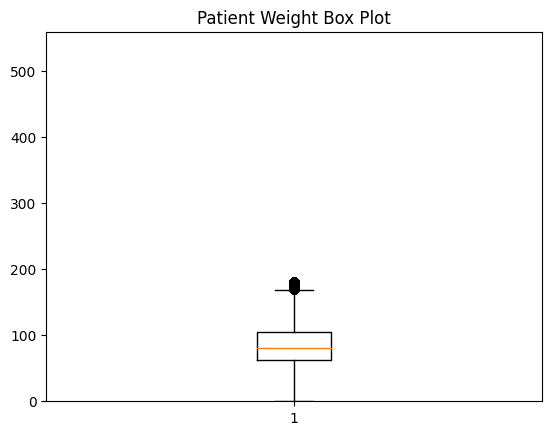

In [49]:
##median, quartiles, and any outliers before removing outliers - There is an issue with large amounts of patients' ages being incorrect
import matplotlib.pyplot as plt

# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.ylim(bottom=0
         , top=3525)
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.ylim(bottom=0, top=559)
plt.show()


In [11]:
# calculate the IQR for Patient Age and Patient Weight
q1_age = df['Patient Age'].quantile(0.25)
q3_age = df['Patient Age'].quantile(0.75)
iqr_age = q3_age - q1_age

q1_weight = df['Patient Weight'].quantile(0.25)
q3_weight = df['Patient Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight

# remove any data points outside of 1.5 times the IQR
df = df[(df['Patient Age'] >= q1_age - 1.5*iqr_age) & (df['Patient Age'] <= q3_age + 1.5*iqr_age)]
df = df[(df['Patient Weight'] >= q1_weight - 1.5*iqr_weight) & (df['Patient Weight'] <= q3_weight + 1.5*iqr_weight)]



In [12]:
# get basic descriptive statistics for the numeric columns - After removing outliers
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())

        Patient Age  Patient Weight
count  15655.000000    15655.000000
mean      50.198722       85.915490
std       20.423576       35.978621
min        0.000000        0.000000
25%       38.000000       62.000000
50%       53.000000       80.000000
75%       65.000000      105.000000
max      101.000000      181.000000


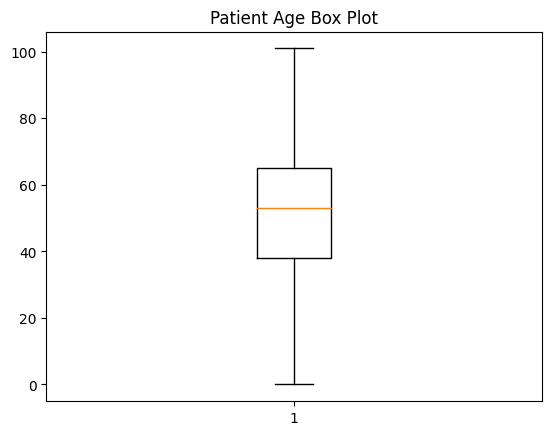

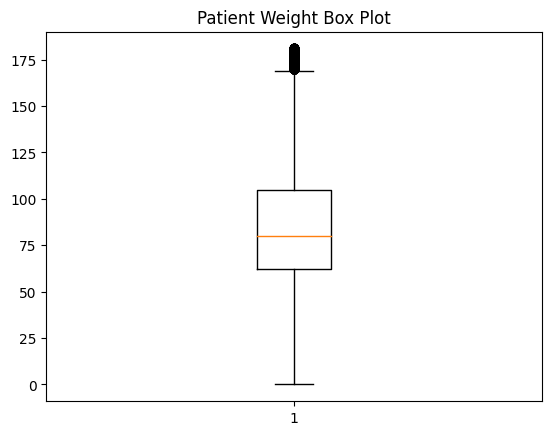

In [13]:
#median, quartiles, and any outliers after removing outliers
import matplotlib.pyplot as plt

# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.show()


In [14]:
median_age = df['Patient Age'].median()
df['Patient Age'].fillna(median_age, inplace=True)

In [15]:
median_weight = df['Patient Weight'].median()
df['Patient Weight'].fillna(median_weight, inplace=True)

In [16]:
print(df.columns)

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag'],
      dtype='object')


In [17]:

# Replace values with 1 and 0 for 'Serious' variable
df['Serious'] = df['Serious'].replace({'Serious': 1, 'Non-Serious': 0})

# Convert variable to categorical variable
df['Serious'] = df['Serious'].astype('category')

df['Serious']

6        1
31       1
33       1
35       1
36       1
        ..
90968    1
90970    1
90974    1
90988    1
91045    1
Name: Serious, Length: 15655, dtype: category
Categories (2, int64): [0, 1]

In [18]:

# Replace values with 1 and 0 for 'Case Priority' variable
df['Case Priority'] = df['Serious'].replace({'Expedited': 1, 'Non-Expedited': 0, 'Direct': 2, '30-DAY': 3, '5-Day': 4, 'BSR': 5})

# Convert variable to categorical variable
df['Case Priority'] = df['Case Priority'].astype('category')

df['Case Priority']

6        1
31       1
33       1
35       1
36       1
        ..
90968    1
90970    1
90974    1
90988    1
91045    1
Name: Case Priority, Length: 15655, dtype: category
Categories (2, int64): [0, 1]

In [19]:

# Replace values with 1 and 0 for 'Sex' variable
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 2, 'Direct': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Sex'] = df['Case Priority'].astype('category')

df['Sex']

6        1
31       1
33       1
35       1
36       1
        ..
90968    1
90970    1
90974    1
90988    1
91045    1
Name: Sex, Length: 15655, dtype: category
Categories (2, int64): [0, 1]

In [20]:

# Replace values with 1 and 0 for 'Reported to Manufacturer?' variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].replace({'Y': 1, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].astype('category')

df['Reported to Manufacturer?']

6        0
31       0
33       0
35       0
36       0
        ..
90968    0
90970    0
90974    0
90988    0
91045    0
Name: Reported to Manufacturer?, Length: 15655, dtype: category
Categories (2, int64): [0, 1]

In [21]:
# Replace values with 1,2, and 0 for 'Reporter Type' variable
df['Reporter Type'] = df['Reporter Type'].replace({'Consumer': 1, 'Healthcare Professional': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reporter Type'] = df['Reporter Type'].astype('category')

df['Reporter Type']

6        0
31       2
33       1
35       2
36       1
        ..
90968    2
90970    2
90974    1
90988    2
91045    2
Name: Reporter Type, Length: 15655, dtype: category
Categories (3, int64): [0, 1, 2]

In [22]:
cleaned_data = df[['Case ID','Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients', 'Reactions', 'Serious', 'Sex',
                   'Patient Age', 'Patient Weight','Reporter Type','Report Source', 'Concomitant Product Names','Country where Event occurred', 'Outcomes','Reported to Manufacturer?',]]
print(cleaned_data)


       Case ID Suspect Product Names  \
6      3803328                Aarane   
31     5403673            Abbokinase   
33     5211845            Abbokinase   
35     5134552            Abbokinase   
36     5100488            Abbokinase   
...        ...                   ...   
90968  5049625                     -   
90970  5039332                     -   
90974  5032936                     -   
90988  5018245                     -   
91045  5066065                     -   

                                          Reason for Use  \
6      Asthma;Exposure To Allergen;Prophylaxis;Rhinit...   
31                                                     -   
33                                                     -   
35                                                     -   
36                                                     -   
...                                                  ...   
90968                                                  -   
90970                                  

In [23]:
#cleaned_data.to_csv('cleaned_data.csv', index=False)

In [24]:

# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(cleaned_data[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(cleaned_data[col].value_counts())


        Patient Age  Patient Weight
count  15655.000000    15655.000000
mean      50.198722       85.915490
std       20.423576       35.978621
min        0.000000        0.000000
25%       38.000000       62.000000
50%       53.000000       80.000000
75%       65.000000      105.000000
max      101.000000      181.000000
1    13472
0     2183
Name: Sex, dtype: int64
Asthma                                                                                                                1240
Dyspnoea;Asthma                                                                                                         77
Condition Aggravated;Asthma                                                                                             66
Asthma;Dyspnoea                                                                                                         66
Drug Ineffective;Asthma                                                                                                 47
               

In [25]:
print(cleaned_data)

       Case ID Suspect Product Names  \
6      3803328                Aarane   
31     5403673            Abbokinase   
33     5211845            Abbokinase   
35     5134552            Abbokinase   
36     5100488            Abbokinase   
...        ...                   ...   
90968  5049625                     -   
90970  5039332                     -   
90974  5032936                     -   
90988  5018245                     -   
91045  5066065                     -   

                                          Reason for Use  \
6      Asthma;Exposure To Allergen;Prophylaxis;Rhinit...   
31                                                     -   
33                                                     -   
35                                                     -   
36                                                     -   
...                                                  ...   
90968                                                  -   
90970                                  

In [26]:
cleaned_data.describe()


,Case ID,Patient Age,Patient Weight
count,1.565500e+04,15655.000000,15655.000000
mean,1.084778e+07,50.198722,85.915490
std,5.448681e+06,20.423576,35.978621
min,3.000461e+06,0.000000,0.000000
25%,6.256401e+06,38.000000,62.000000
50%,9.410444e+06,53.000000,80.000000
75%,1.568398e+07,65.000000,105.000000
max,2.181218e+07,101.000000,181.000000


In [30]:
baskets = []
num = 1
temp_basket = []
last_line = False
for index, row in df.iterrows():
    ## check whether the new row is from the same patient or not
    ## If it is the same patient, the new row will be put into the same basket
    ## If not, create a new basket.
    if num == 1:
        previous_id = row["Case ID"]
        current_id = row["Case ID"]
        first_line = True
    elif num == df.shape[0]:
        last_line = True
        first_line = False
        previous_id = current_id
        current_id = row["Case ID"]
    else:
        first_line = False
        previous_id = current_id
        current_id = row["Case ID"]
    ## if the new row is from the same patient, only add the adverse drug reaction
    if previous_id == current_id :
        same_patient = True
    else:
        same_patient = False
    if same_patient:
        temp_basket.append(row["Reason for Use"])
        if first_line:
            temp_basket.append(row["Suspect Product Names"])
    else:
        baskets.append(temp_basket)
        temp_basket = []
        temp_basket.append(row["Suspect Product Names"])
        temp_basket.append(row["Reason for Use"])
    if last_line:
        baskets.append(temp_basket)
    num += 1
    
    

In [31]:
len(baskets)


15655

In [32]:
baskets[0]


['Asthma;Exposure To Allergen;Prophylaxis;Rhinitis Allergic', 'Aarane']

In [33]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))

{'Asthma;Rhinitis', 'Anticoagulant Therapy;Asthma', 'Nexium;Pulmicort Turbuhaler;Nexium 24hr;Symbicort', 'Arthralgia;Cardiac Disorder;Dyspepsia;Hypertension;Osteoarthritis', 'Drug Use Disorder;Product Used For Unknown Indication;Pulmonary Arterial Hypertension;Pulmonary Hypertension', 'Singulair;Ventolin;Symbicort;Montelukast', 'Spiriva;Symbicort;Nucala;Pulmicort Turbuhaler', 'Asthma;Chronic Obstructive Pulmonary Disease;Dyspnoea;Insomnia', 'Hepatic Cancer;Pneumothorax', 'Vitamin D;Dexilant;Singulair;Xolair;Prevnar 13;Montelukast;Trazodone;Jublia;Synthroid;Symbicort;Nasonex;Atrovent;Nucala;Spiriva;Senokot;Ventolin', "Gaucher's Disease;Product Used For Unknown Indication;Thrombosis Prophylaxis", 'Revlimid;Doxil', 'Chronic Lymphocytic Leukaemia Stage 3', 'Asthma;Hiatus Hernia;Hypertension', 'Bayer Aspirin', 'Cerebrovascular Accident Prophylaxis;Product Used For Unknown Indication', 'Cardiac Stress Test;Product Used For Unknown Indication', 'Depression;Heart Disease Congenital;Pain In Ext

In [34]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Asthma;Rhinitis  Anticoagulant Therapy;Asthma  \
0                0                             0   
1                0                             0   
2                0                             0   
3                0                             0   
4                0                             0   

   Nexium;Pulmicort Turbuhaler;Nexium 24hr;Symbicort  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Arthralgia;Cardiac Disorder;Dyspepsia;Hypertension;Osteoarthritis  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0          

In [44]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(converted_basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support                                      itemsets
0  0.021718                                   (Symbicort)
1  0.013159                                      (Enbrel)
2  0.261769                                           (-)
3  0.035388         (Product Used For Unknown Indication)
4  0.067710  (Asthma;Product Used For Unknown Indication)


In [45]:
frequent_itemsets = apriori(converted_basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                           itemsets
0   0.021718                                        (Symbicort)
1   0.013159                                           (Enbrel)
2   0.261769                                                (-)
3   0.035388              (Product Used For Unknown Indication)
4   0.067710       (Asthma;Product Used For Unknown Indication)
5   0.025040                                            (Vioxx)
6   0.125647                                           (Asthma)
7   0.057042                                           (Xolair)
8   0.023635                             (Rheumatoid Arthritis)
9   0.013478                                         (Remicade)
10  0.028681                                           (Humira)
11  0.022676                                        (-, Asthma)
12  0.019738  (Xolair, Asthma;Product Used For Unknown Indic...
13  0.017502                                   (Xolair, Asthma)


In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

                                    antecedents  \
0                                      (Xolair)   
1  (Asthma;Product Used For Unknown Indication)   
2                                      (Xolair)   
3                                      (Asthma)   

                                    consequents  antecedent support  \
0  (Asthma;Product Used For Unknown Indication)            0.057042   
1                                      (Xolair)            0.067710   
2                                      (Asthma)            0.057042   
3                                      (Xolair)            0.125647   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.067710  0.019738    0.346025  5.110392  0.015876    1.425574  
1            0.057042  0.019738    0.291509  5.110392  0.015876    1.330939  
2            0.125647  0.017502    0.306831  2.442012  0.010335    1.261385  
3            0.057042  0.017502    0.139298  2.442012  0.010335    1.095568 

In [47]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Xolair),(Asthma;Product Used For Unknown Indication),0.057042,0.067710,0.019738,0.346025,5.110392,0.015876,1.425574
1,(Asthma;Product Used For Unknown Indication),(Xolair),0.067710,0.057042,0.019738,0.291509,5.110392,0.015876,1.330939
2,(Xolair),(Asthma),0.057042,0.125647,0.017502,0.306831,2.442012,0.010335,1.261385
3,(Asthma),(Xolair),0.125647,0.057042,0.017502,0.139298,2.442012,0.010335,1.095568


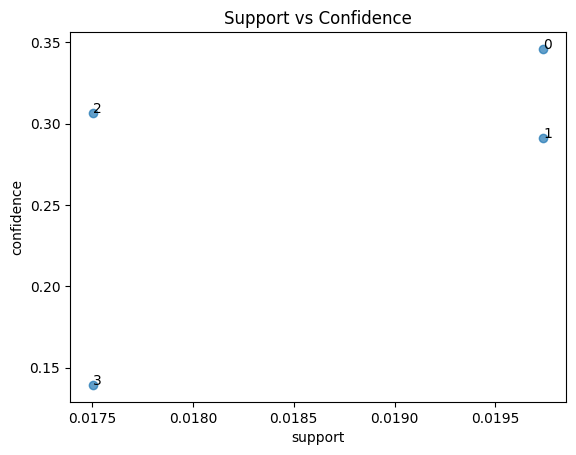

In [48]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [51]:
# group the data by 'Suspect Product Names' and count the number of occurrences
count_df = df.groupby('Suspect Product Names').size().reset_index(name='Count')

# sort the data by 'Count' in descending order
sorted_df = count_df.sort_values(by='Count', ascending=False)

# print the top 10 results
print(sorted_df.head(10))

     Suspect Product Names  Count
0                        -   2856
3342                Xolair    893
1286                Humira    449
3224                 Vioxx    392
2737             Symbicort    340
2300              Remicade    211
983                 Enbrel    206
2206   Pulmicort Flexhaler    133
930               Dupixent    128
2473             Singulair    127


In [52]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
symbicort_df = df[df['Suspect Product Names'] == 'Symbicort']

# print the results
print(symbicort_df)

        Case ID Suspect Product Names  \
55314  21472644             Symbicort   
55320  18441749             Symbicort   
55382  20654535             Symbicort   
55400  20784124             Symbicort   
55404  20670436             Symbicort   
...         ...                   ...   
57338   6913666             Symbicort   
57349   6748067             Symbicort   
57352   6670757             Symbicort   
57358   6588315             Symbicort   
57361   6514597             Symbicort   

                      Suspect Product Active Ingredients  \
55314  Budesonide\Formoterol Fumarate Dihydrate;Budes...   
55320  Budesonide\Formoterol Fumarate Dihydrate;Glyco...   
55382           Budesonide\Formoterol Fumarate Dihydrate   
55400  Budesonide\Formoterol Fumarate Dihydrate;Budes...   
55404           Budesonide\Formoterol Fumarate Dihydrate   
...                                                  ...   
57338           Budesonide\Formoterol Fumarate Dihydrate   
57349           Budesonide\

In [54]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --------------------- ------------------ 0.8/1.5 MB 26.4 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/96.6 kB ? eta -:--:--
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/267.7 kB ? eta -:--:--
     ------------------------------------- 267.7/267.7 kB 16.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [59]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
symbicort_df = df[df['Suspect Product Names'] == 'Symbicort']

# extract words from 'Reactions' column and tokenize them
reactions = symbicort_df['Reactions'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('asthma', 342), ('product', 275), ('issue', 158), ('intentional', 130), ('use', 128), ('misuse', 122), ('device', 99), ('dose', 94), ('dyspnoea', 94), ('label', 83)]


In [60]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords


In [61]:
tokenizer = RegexpTokenizer(r'\w+')
symbicort_df['tokens'] = symbicort_df['Reactions'].apply(lambda x: tokenizer.tokenize(x.lower()))


C:\Users\chera\AppData\Local\Temp\ipykernel_26332\99290281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbicort_df['tokens'] = symbicort_df['Reactions'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [62]:
stop_words = set(stopwords.words('english'))
symbicort_df['tokens'] = symbicort_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\chera\AppData\Local\Temp\ipykernel_26332\2875866507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbicort_df['tokens'] = symbicort_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [63]:
fdist = FreqDist([word for tokens in symbicort_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [64]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


asthma: 342
product: 275
issue: 158
intentional: 130
use: 128
misuse: 122
device: 99
dose: 94
dyspnoea: 94
label: 83


In [65]:
for index, row in symbicort_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 55314:
pulmonary: 3
oedema: 2
oropharyngeal: 2
drug: 2
increased: 2
blistering: 1
mass: 1
delivery: 1
system: 1
issue: 1
Row 55320:
septic: 1
shock: 1
therapeutic: 1
product: 1
effect: 1
incomplete: 1
pneumonia: 1
pleural: 1
effusion: 1
full: 1
Row 55382:
issue: 2
product: 1
packaging: 1
quantity: 1
infection: 1
asthma: 1
device: 1
pharyngeal: 1
injury: 1
impaired: 1
Row 55400:
device: 2
use: 2
issue: 2
product: 2
nervousness: 1
malfunction: 1
asthma: 1
anaphylactic: 1
reaction: 1
intentional: 1
Row 55404:
device: 3
product: 3
use: 2
issue: 2
chronic: 1
obstructive: 1
pulmonary: 1
disease: 1
amnesia: 1
dispensing: 1
Row 55407:
decreased: 2
device: 2
body: 1
height: 1
cataract: 1
label: 1
use: 1
asthma: 1
cough: 1
memory: 1
Row 55411:
cardiac: 1
valve: 1
disease: 1
asthma: 1
covid: 1
19: 1
Row 55415:
rhinitis: 1
asthma: 1
Row 55431:
asthma: 1
amnesia: 1
bronchitis: 1
device: 1
leakage: 1
infection: 1
visual: 1
impairment: 1
weight: 1
decreased: 1
Row 55440:
issue: 3
product: 2
dose:

In [68]:

# create a new column to store the tokenized reactions
df['Reactions_Tokenized'] = df['Reactions'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')

asthma: 15655
dyspnoea: 4214
cough: 2548
wheezing: 1920
pneumonia: 1607
fatigue: 1550
drug ineffective: 1513
headache: 1400
chest pain: 1225
nausea: 1212
condition aggravated: 1191
bronchitis: 1177
pain: 1127
pyrexia: 1052
nasopharyngitis: 1043
dizziness: 1040
hypertension: 1033
malaise: 1025
chest discomfort: 969
weight increased: 965
chronic obstructive pulmonary disease: 964
weight decreased: 960
arthralgia: 945
anxiety: 935
vomiting: 929
hypersensitivity: 925
therapeutic product effect incomplete: 908
diarrhoea: 880
sinusitis: 846
asthenia: 845
depression: 810
gastrooesophageal reflux disease: 766
productive cough: 764
full blood count abnormal: 759
obstructive airways disorder: 751
loss of personal independence in daily activities: 734
insomnia: 731
back pain: 699
pain in extremity: 689
fall: 679
pruritus: 678
off label use: 635
rash: 626
urticaria: 572
nasal congestion: 569
drug hypersensitivity: 543
blood pressure increased: 542
influenza: 534
oropharyngeal pain: 512
oedema peri

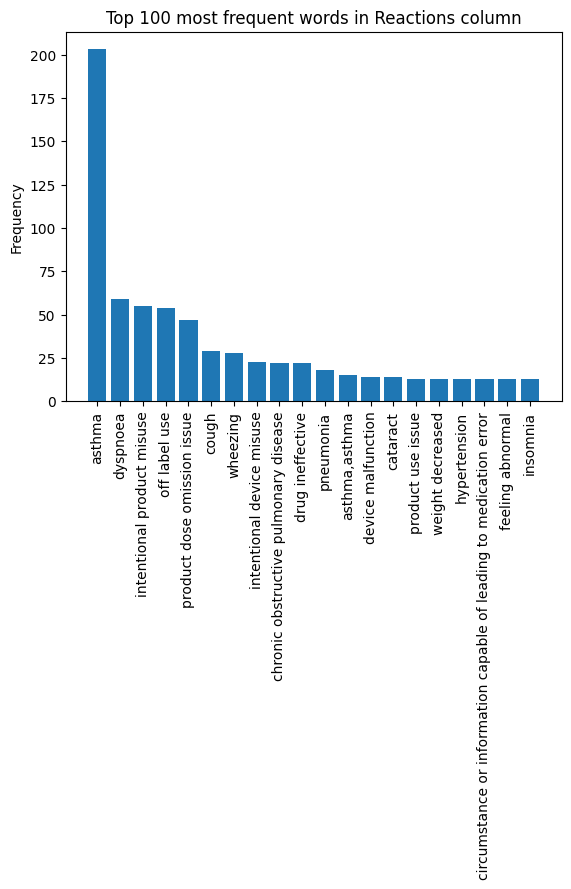

In [71]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = symbicort_df['Reactions'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()
